<a href="https://colab.research.google.com/github/fof2301/tweet_sentiment_analysys/blob/main/AIML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


In [ ]:
df.sample(10)
test.sample(5)

,target,ids,date,flag,user,text
3,4,NaN,NaN,NaN,NaN,Hope today Every ICT fan realised today that h...
4,4,NaN,NaN,NaN,NaN,There's something about Australia...they come ...
1,4,NaN,NaN,NaN,NaN,"""Where there is Virat kohli there is Hope """
2,0,NaN,NaN,NaN,NaN,Reason we lost the match.\n\nShame on you BJP.
0,0,NaN,NaN,NaN,NaN,Not a single fifty from the Indian Top 4 in bo...


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of          target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot h

In [ ]:
test.head

<bound method NDFrame.head of    target  ids  date  flag  user  \
0       0  NaN   NaN   NaN   NaN   
1       4  NaN   NaN   NaN   NaN   
2       0  NaN   NaN   NaN   NaN   
3       4  NaN   NaN   NaN   NaN   
4       4  NaN   NaN   NaN   NaN   

                                                text  
0  Not a single fifty from the Indian Top 4 in bo...  
1        "Where there is Virat kohli there is Hope "  
2     Reason we lost the match.\n\nShame on you BJP.  
3  Hope today Every ICT fan realised today that h...  
4  There's something about Australia...they come ...  >

In [ ]:
print('length of data is', len(df))

length of data is 1600000


In [ ]:
df.shape

(1600000, 6)

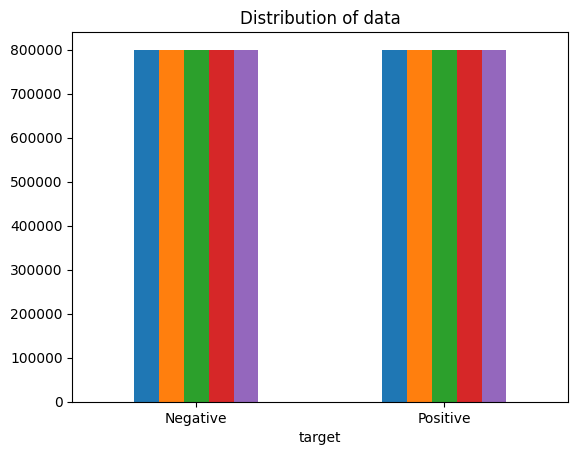

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])


In [ ]:
test_text, test_sentiment = list(test['text']),list(test['target'])

In [ ]:
text

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [ ]:
test_text

['Not a single fifty from the Indian Top 4 in both the WTC Finals.',
 '"Where there is Virat kohli there is Hope "',
 'Reason we lost the match.\n\nShame on you BJP.',
 'Hope today Every ICT fan realised today that how GREAT Rishabh Pant is ',
 "There's something about Australia...they come with a built-in software of champions. \nCongratulations on winning another tournament! "]

<Axes: xlabel='target', ylabel='count'>

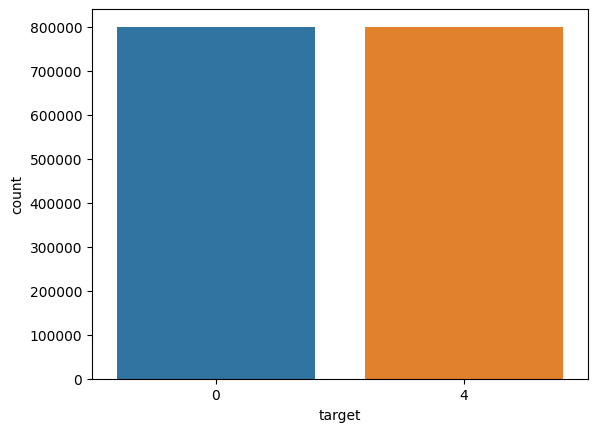

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
data=df[['text','target']]
test_data=test[['text','target']]

In [ ]:
test_data

,text,target
0,Not a single fifty from the Indian Top 4 in bo...,0
1,"""Where there is Virat kohli there is Hope """,4
2,Reason we lost the match.\n\nShame on you BJP.,0
3,Hope today Every ICT fan realised today that h...,4
4,There's something about Australia...they come ...,4


In [ ]:
data['target'] = data['target'].replace(4,1)
test_data['target'] = test_data['target'].replace(4,1)

<ipython-input-19-af8dde7ce1e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)
<ipython-input-19-af8dde7ce1e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['target'] = test_data['target'].replace(4,1)


In [ ]:
data['target'].unique()
test_data['target'].unique()

array([0, 1])

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
test_data_pos = test_data[test_data['target'] == 1]
test_data_neg = test_data[test_data['target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])
test_dataset = pd.concat([test_data_pos, test_data_neg])
test_data = pd.concat([test_data_pos, test_data_neg])



In [ ]:
test_dataset

,text,target
1,"""Where there is Virat kohli there is Hope """,1
3,Hope today Every ICT fan realised today that h...,1
4,There's something about Australia...they come ...,1
0,Not a single fifty from the Indian Top 4 in bo...,0
2,Reason we lost the match.\n\nShame on you BJP.,0


In [ ]:
dataset

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
19995,"Not much time off this weekend, work trip to M...",0
19996,One more day of holidays,0
19997,feeling so down right now .. i hate you DAMN H...,0
19998,"geez,i hv to READ the whole book of personalit...",0


In [ ]:
test_dataset

,text,target
1,"""Where there is Virat kohli there is Hope """,1
3,Hope today Every ICT fan realised today that h...,1
4,There's something about Australia...they come ...,1
0,Not a single fifty from the Indian Top 4 in bo...,0
2,Reason we lost the match.\n\nShame on you BJP.,0


In [ ]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [ ]:
test_dataset['text']=test_dataset['text'].str.lower()
test_dataset['text'].tail()

1          "where there is virat kohli there is hope "
3    hope today every ict fan realised today that h...
4    there's something about australia...they come ...
0    not a single fifty from the indian top 4 in bo...
2       reason we lost the match.\n\nshame on you bjp.
Name: text, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
#removing stopwords from test data
test_dataset['text'] = test_dataset['text'].apply(lambda text: cleaning_stopwords(text))
test_dataset['text'].head()

1                            "where virat kohli hope "
3    hope today every ict fan realised today great ...
4    there's something australia...they come built-...
0            not single fifty indian top 4 wtc finals.
2                        reason lost match. shame bjp.
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
#removing punct from test data
test_dataset['text']= test_dataset['text'].apply(lambda x: cleaning_punctuations(x))
test_dataset['text'].tail()

1                              where virat kohli hope 
3    hope today every ict fan realised today great ...
4    theres something australiathey come builtin so...
0             not single fifty indian top 4 wtc finals
2                          reason lost match shame bjp
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
#removing repeating char from test data
test_dataset['text'] = test_dataset['text'].apply(lambda x: cleaning_repeating_char(x))
test_dataset['text'].tail()

1                              where virat kohli hope 
3    hope today every ict fan realised today great ...
4    theres something australiathey come builtin so...
0             not single fifty indian top 4 wtc finals
2                          reason lost match shame bjp
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
#cleaning urls from test data
test_dataset['text'] = test_dataset['text'].apply(lambda x: cleaning_URLs(x))
test_dataset['text'].tail()

1                              where virat kohli hope 
3    hope today every ict fan realised today great ...
4    theres something australiathey come builtin so...
0             not single fifty indian top 4 wtc finals
2                          reason lost match shame bjp
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
#removing numbers from test data
test_dataset['text'] = test_dataset['text'].apply(lambda x: cleaning_numbers(x))
test_dataset['text'].tail()

1                              where virat kohli hope 
3    hope today every ict fan realised today great ...
4    theres something australiathey come builtin so...
0              not single fifty indian top  wtc finals
2                          reason lost match shame bjp
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
#tokenizing test data
test_dataset['text'] = test_dataset['text'].apply(tokenizer.tokenize)
test_dataset['text'].head()



1                          [where, virat, kohli, hope]
3    [hope, today, every, ict, fan, realised, today...
4    [theres, something, australiathey, come, built...
0       [not, single, fifty, indian, top, wtc, finals]
2                    [reason, lost, match, shame, bjp]
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
test_dataset['text']= test_dataset['text'].apply(lambda x: stemming_on_text(x))
test_dataset['text'].head()

1                          [where, virat, kohli, hope]
3    [hope, today, every, ict, fan, realised, today...
4    [theres, something, australiathey, come, built...
0       [not, single, fifty, indian, top, wtc, finals]
2                    [reason, lost, match, shame, bjp]
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
#lemmatizing test data
test_dataset['text'] = test_dataset['text'].apply(lambda x: lemmatizer_on_text(x))
test_dataset['text'].head()

1                          [where, virat, kohli, hope]
3    [hope, today, every, ict, fan, realised, today...
4    [theres, something, australiathey, come, built...
0       [not, single, fifty, indian, top, wtc, finals]
2                    [reason, lost, match, shame, bjp]
Name: text, dtype: object

In [ ]:
X = data.text
y = data.target
X_test_data = test_data.text
y_test_data = test_data.target

In [ ]:
X_test_data

0    Not a single fifty from the Indian Top 4 in bo...
1          "Where there is Virat kohli there is Hope "
2       Reason we lost the match.\n\nShame on you BJP.
3    Hope today Every ICT fan realised today that h...
4    There's something about Australia...they come ...
Name: text, dtype: object

In [ ]:
y_test_data

0    0
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

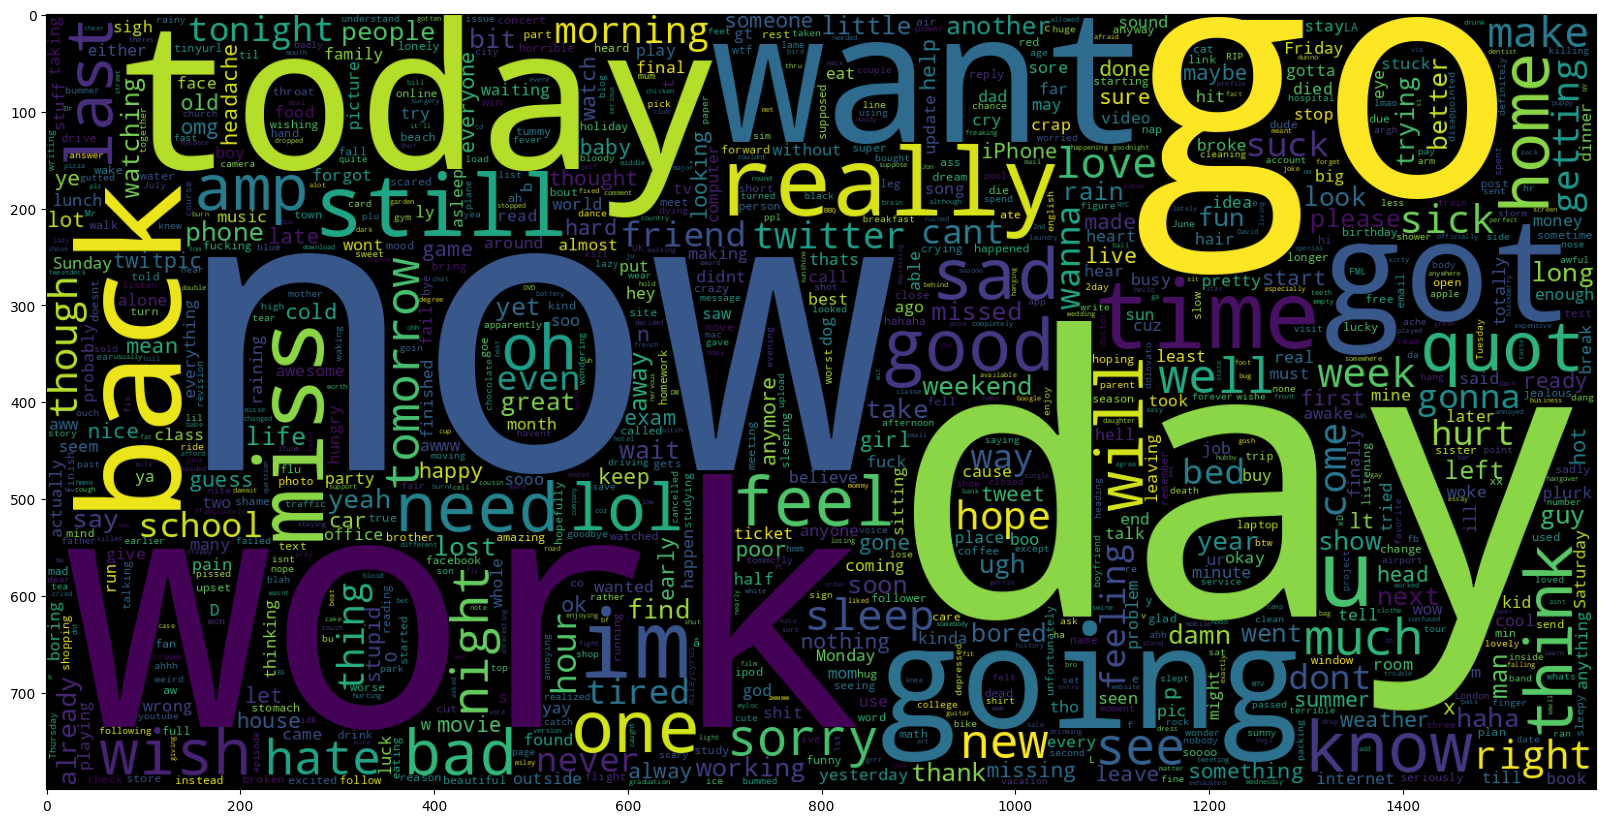

In [ ]:
#cloud of negative words
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

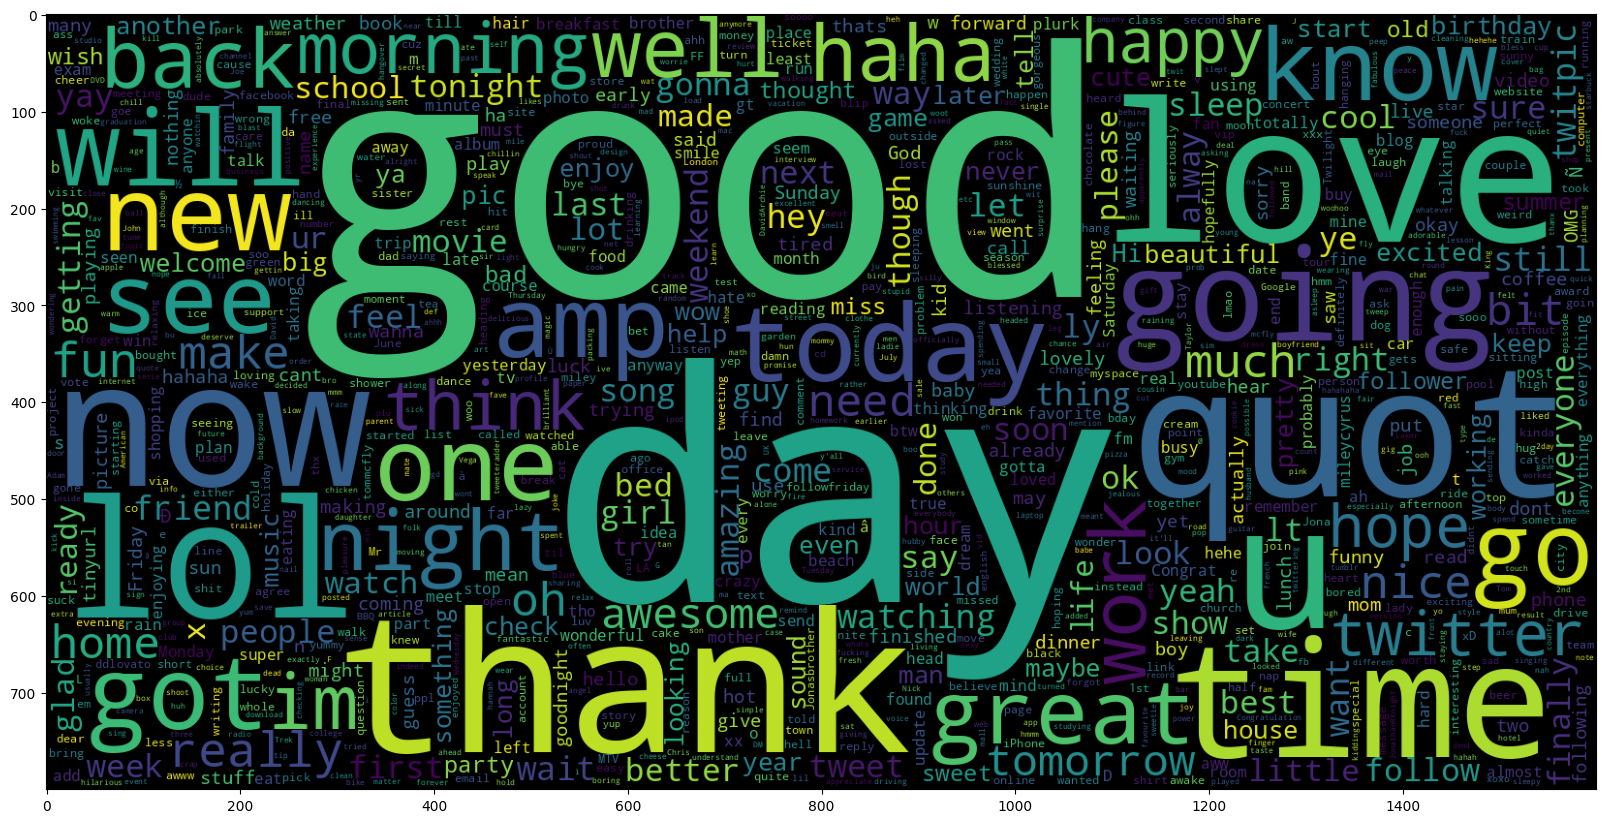

In [ ]:
#cloud of positive words
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Separating 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05,random_state = 26105111)

In [ ]:
print(X_test)

1562805                                    Going to the QVB 
1463536                                Happy mother's day ! 
1253186    Meeting up with timmy boy @ pahntastics, then ...
723307     Don't know why but i'm missing juanjo more tha...
1076693    Drinking a beer but just enjoying it .not gett...
                                 ...                        
97603              nooooooooooo dont want a 3 hour meeting! 
635111     actually going to bed at a reasonable time. su...
1063228    Time for some Dogfish Head 75 minute! Try and ...
314151     @crowderband sadly you're not coming to Los an...
279086                   @ChiNurse oh ugh - what a buzzkill 
Name: text, Length: 80000, dtype: object


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test_data = vectoriser.transform(X_test_data)


In [ ]:
X_test = vectoriser.transform(X_test)


In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  print(y_pred) #added


# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)




MODEL 1

[1 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



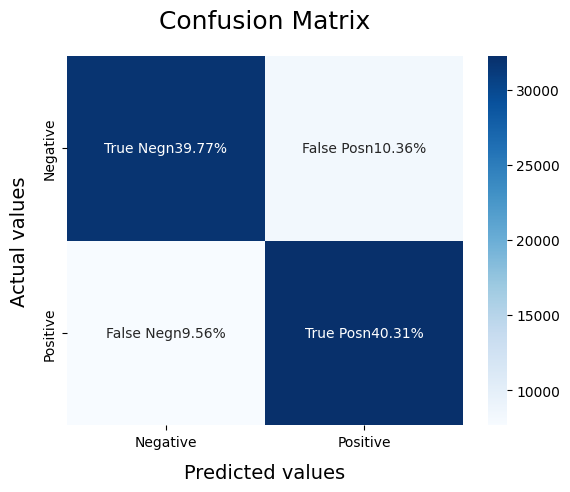

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)


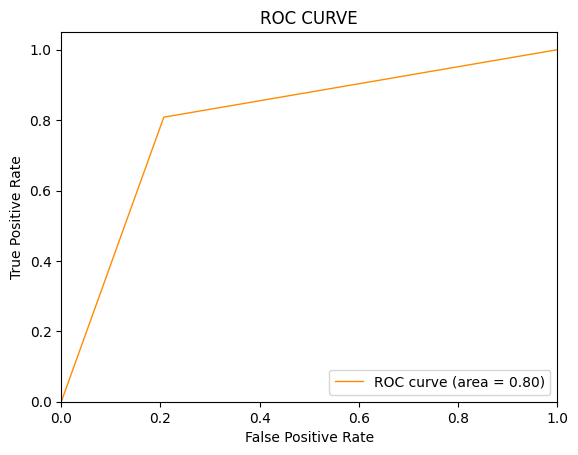

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

MODEL 2

[1 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



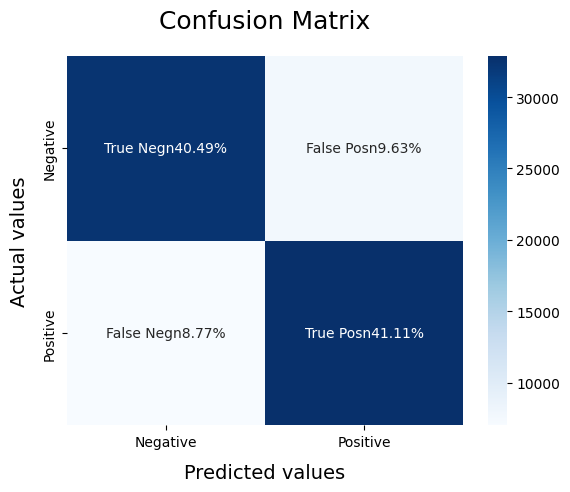

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
pred = model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

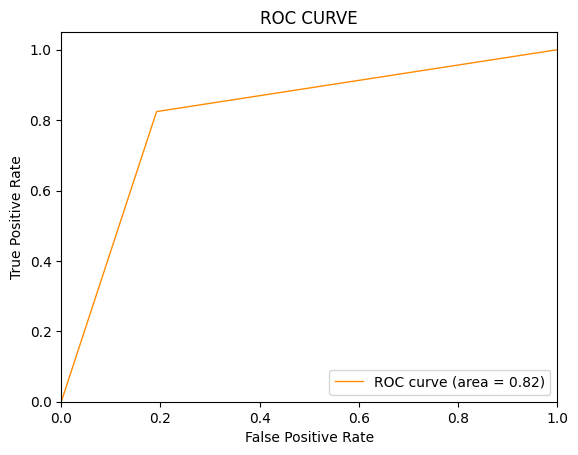

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

MODEL 3

[1 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



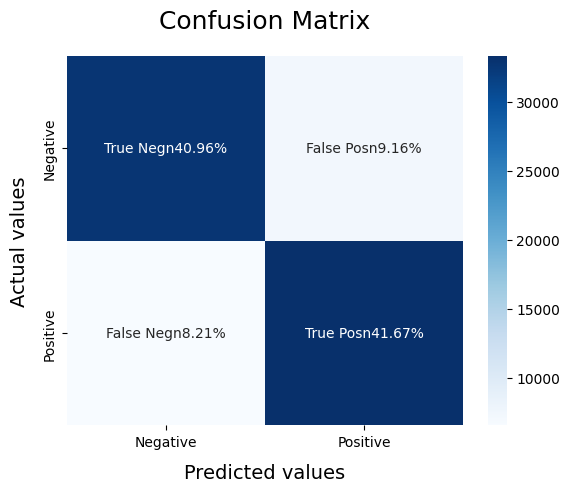

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

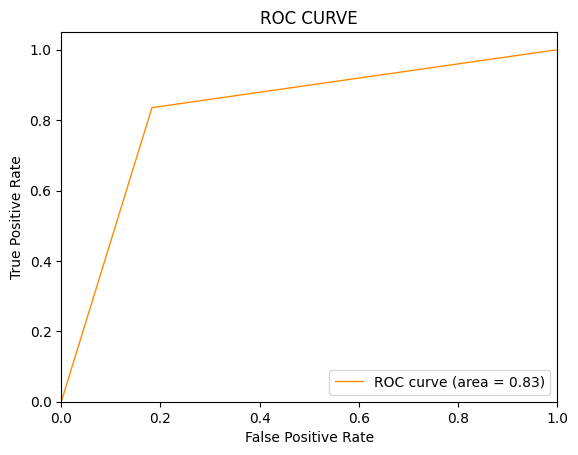

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<BarContainer object of 2 artists>

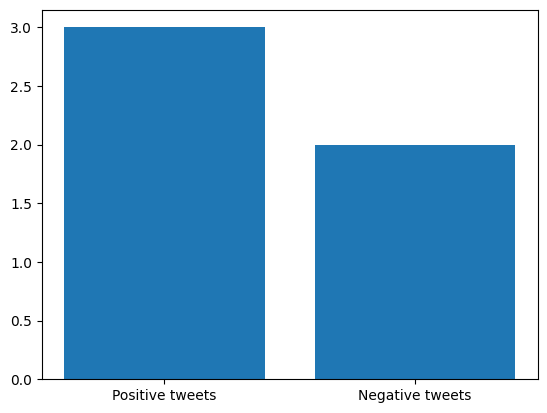

In [ ]:
y_pred =LRmodel.predict(X_test_data)
neg=np.count_nonzero(y_pred==0)
pos=np.count_nonzero(y_pred==1)
#print(neg,pos)
plt.bar(["Positive tweets","Negative tweets"],[pos,neg], label="Data 1")

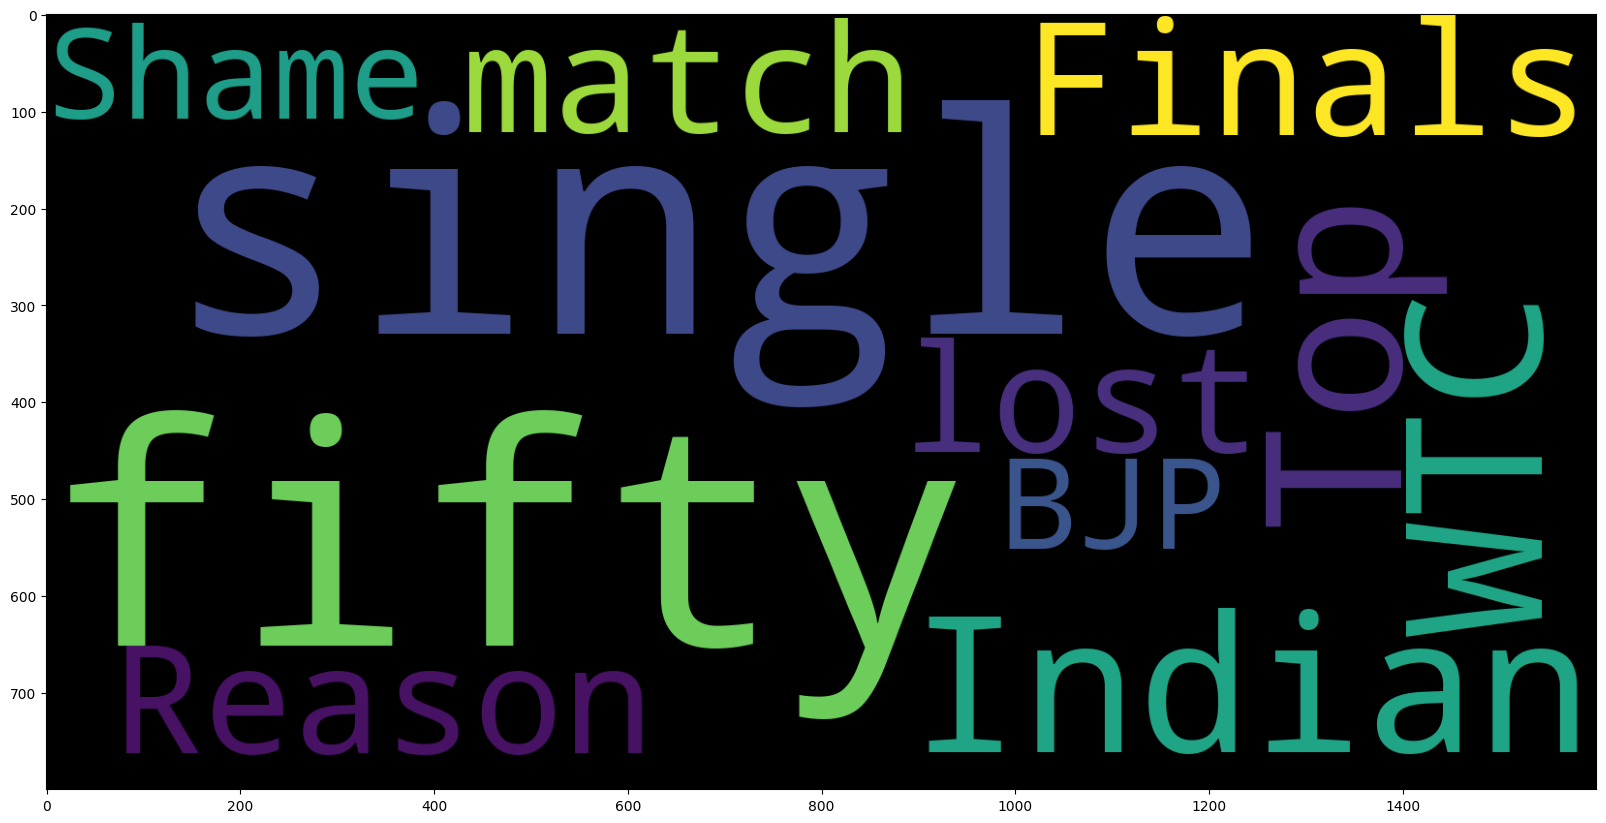

In [ ]:
#cloud of negative words
data_neg = test_data['text'][3:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

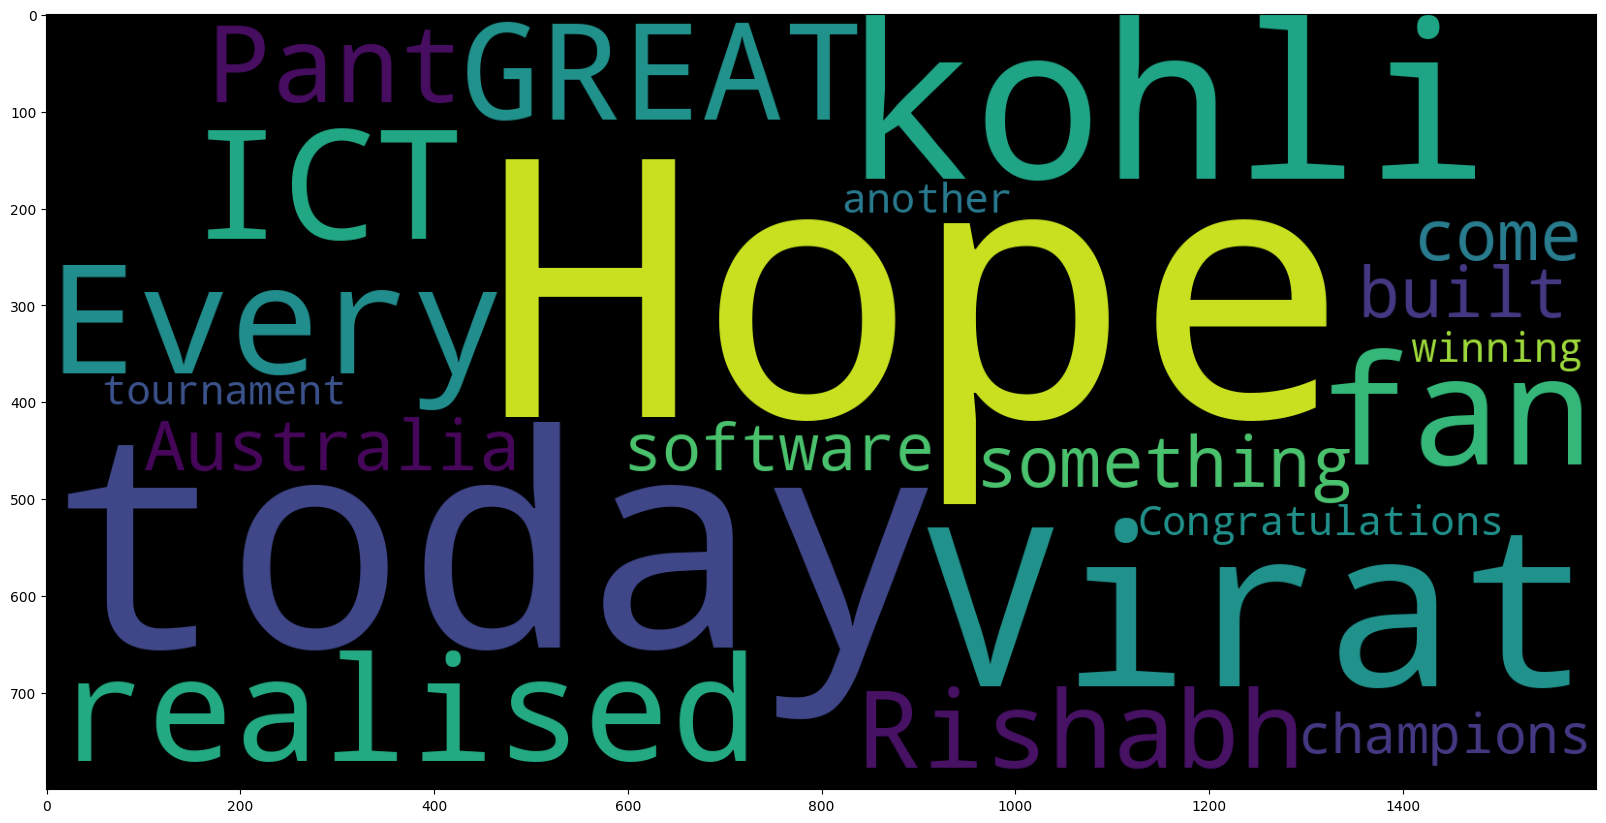

In [ ]:
#cloud of positive words
data_pos = test_data['text'][:3]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)